<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/main/11-House_Price/Nb_11_House_Pricing_data_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving boston.csv to boston.csv


In [4]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [5]:
df = pd.read_csv('boston.csv')

In [6]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
target = "MEDV"
X = df.drop(columns=["CHAS","RAD", target])
y = df[target]

# MI - Mutual Information

In [10]:
from sklearn.feature_selection import mutual_info_regression


mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI': mi}).sort_values(by='MI', ascending=False)
print(mi_df)

    Feature        MI
10    LSTAT  0.667672
4        RM  0.525423
3       NOX  0.464926
2     INDUS  0.458929
8   PTRATIO  0.442406
7       TAX  0.354339
0      CRIM  0.340369
5       AGE  0.310171
6       DIS  0.296728
1        ZN  0.188583
9         B  0.155575


# Corr

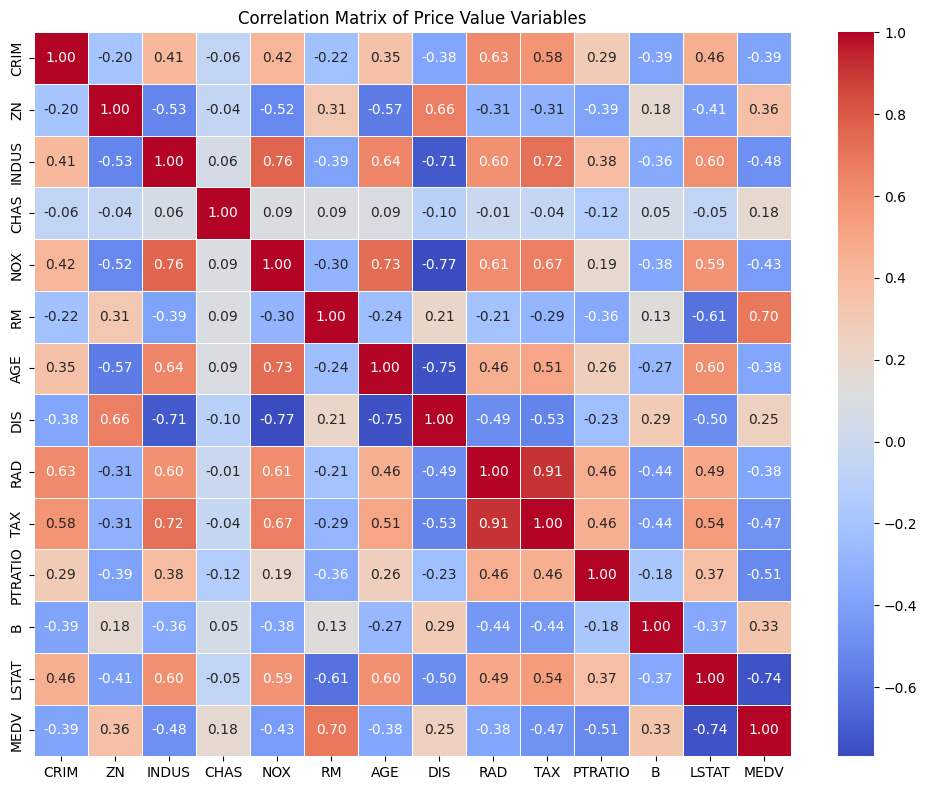

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Title = "Price Value"
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title(f"Correlation Matrix of {Title} Variables")
plt.tight_layout()
plt.show()

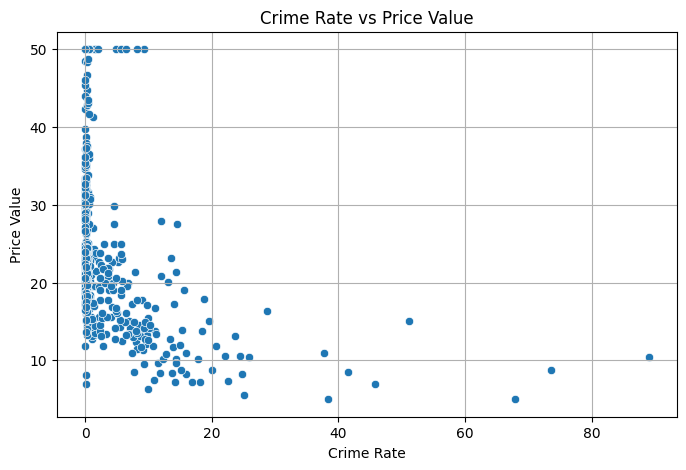

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=numeric_df,
    x='CRIM',
    y=target
)

plt.xlabel("Crime Rate")
plt.ylabel("Price Value")
plt.title("Crime Rate vs Price Value")
plt.grid(True)
plt.show()

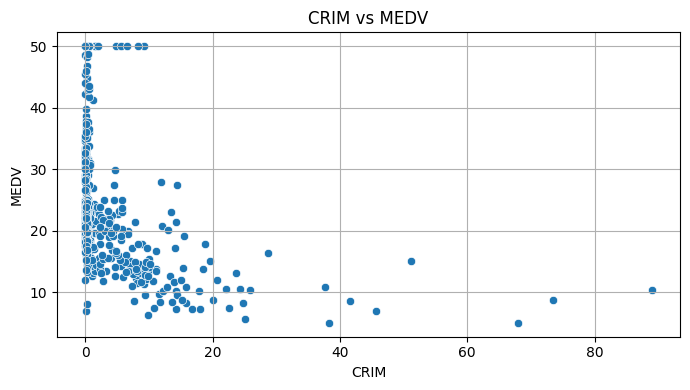

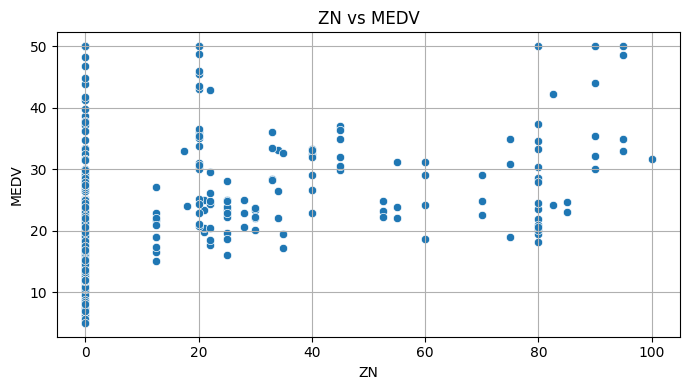

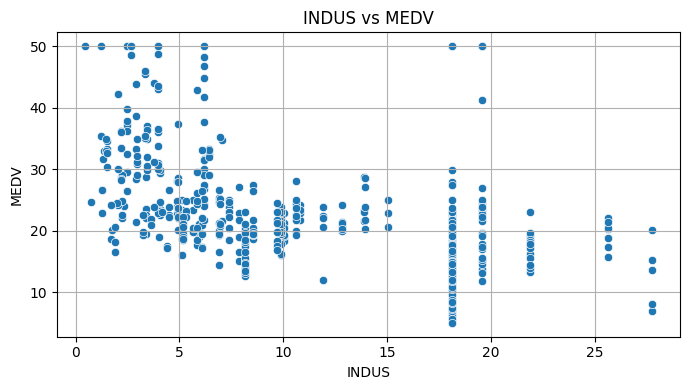

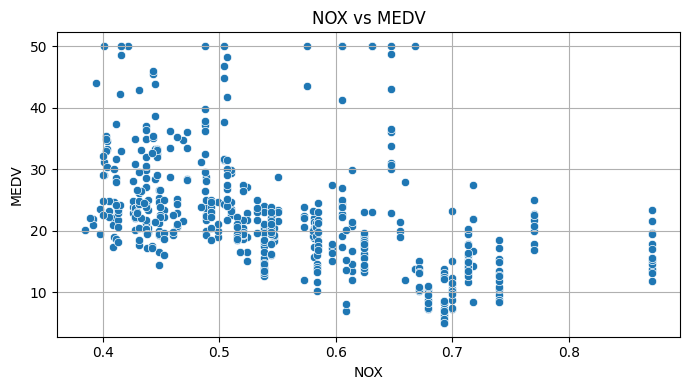

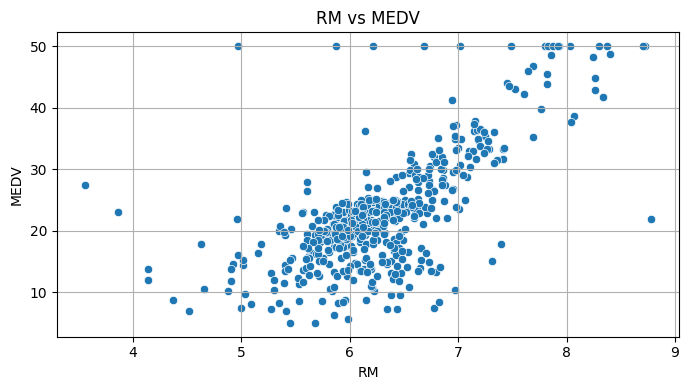

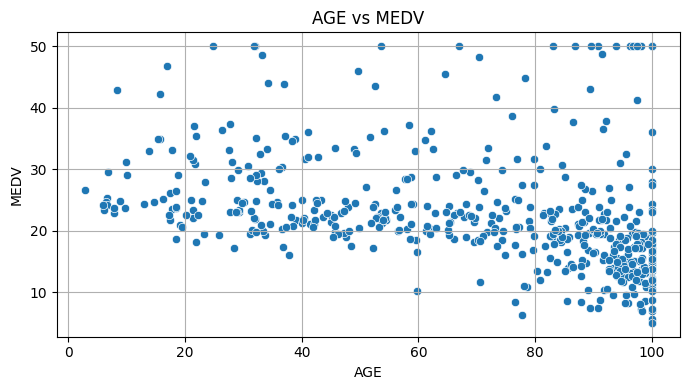

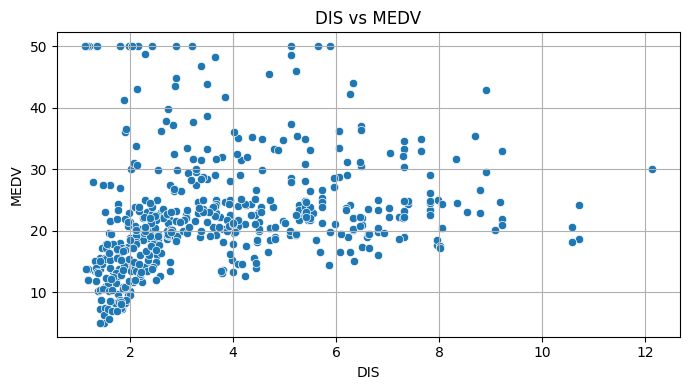

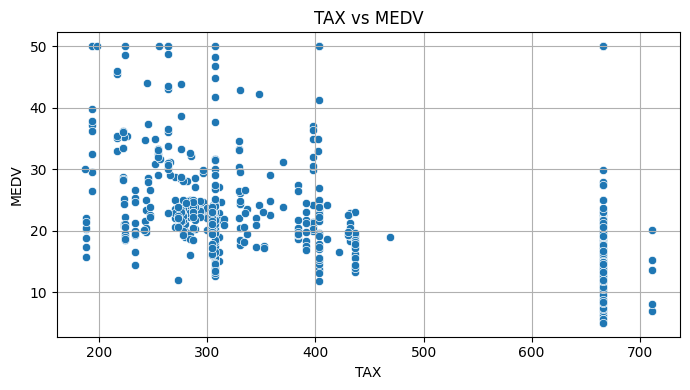

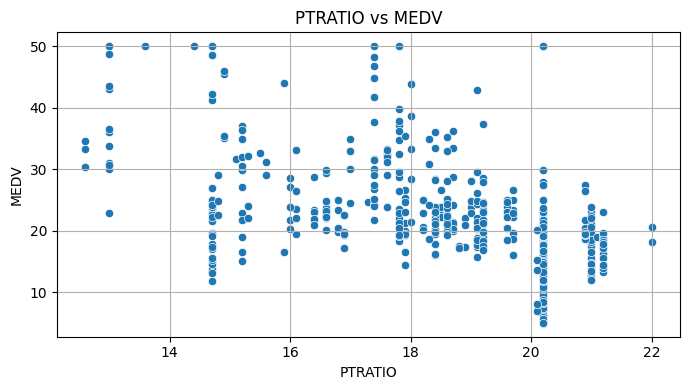

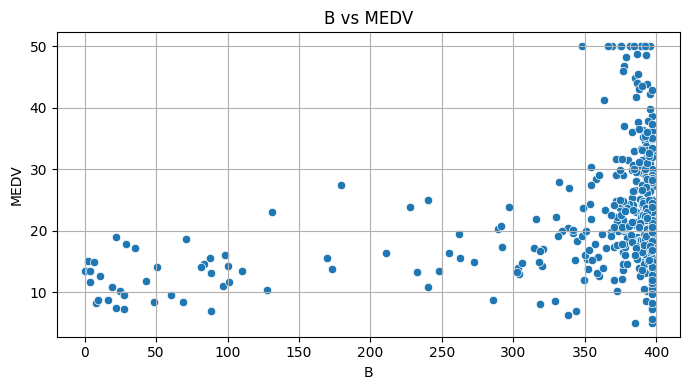

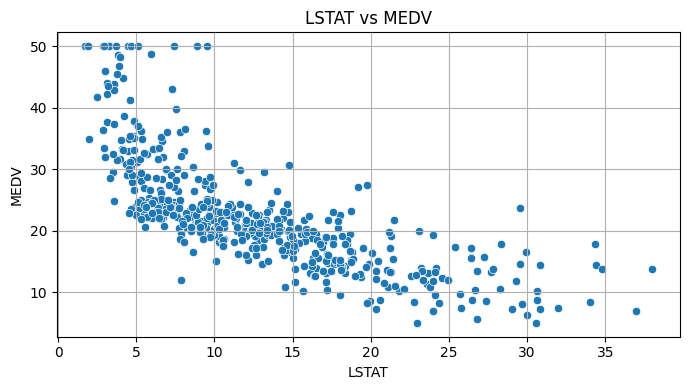

In [15]:
features = X
numeric = df.drop(columns=["CHAS","RAD"])
for feature in features:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=numeric, x=feature, y=target)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

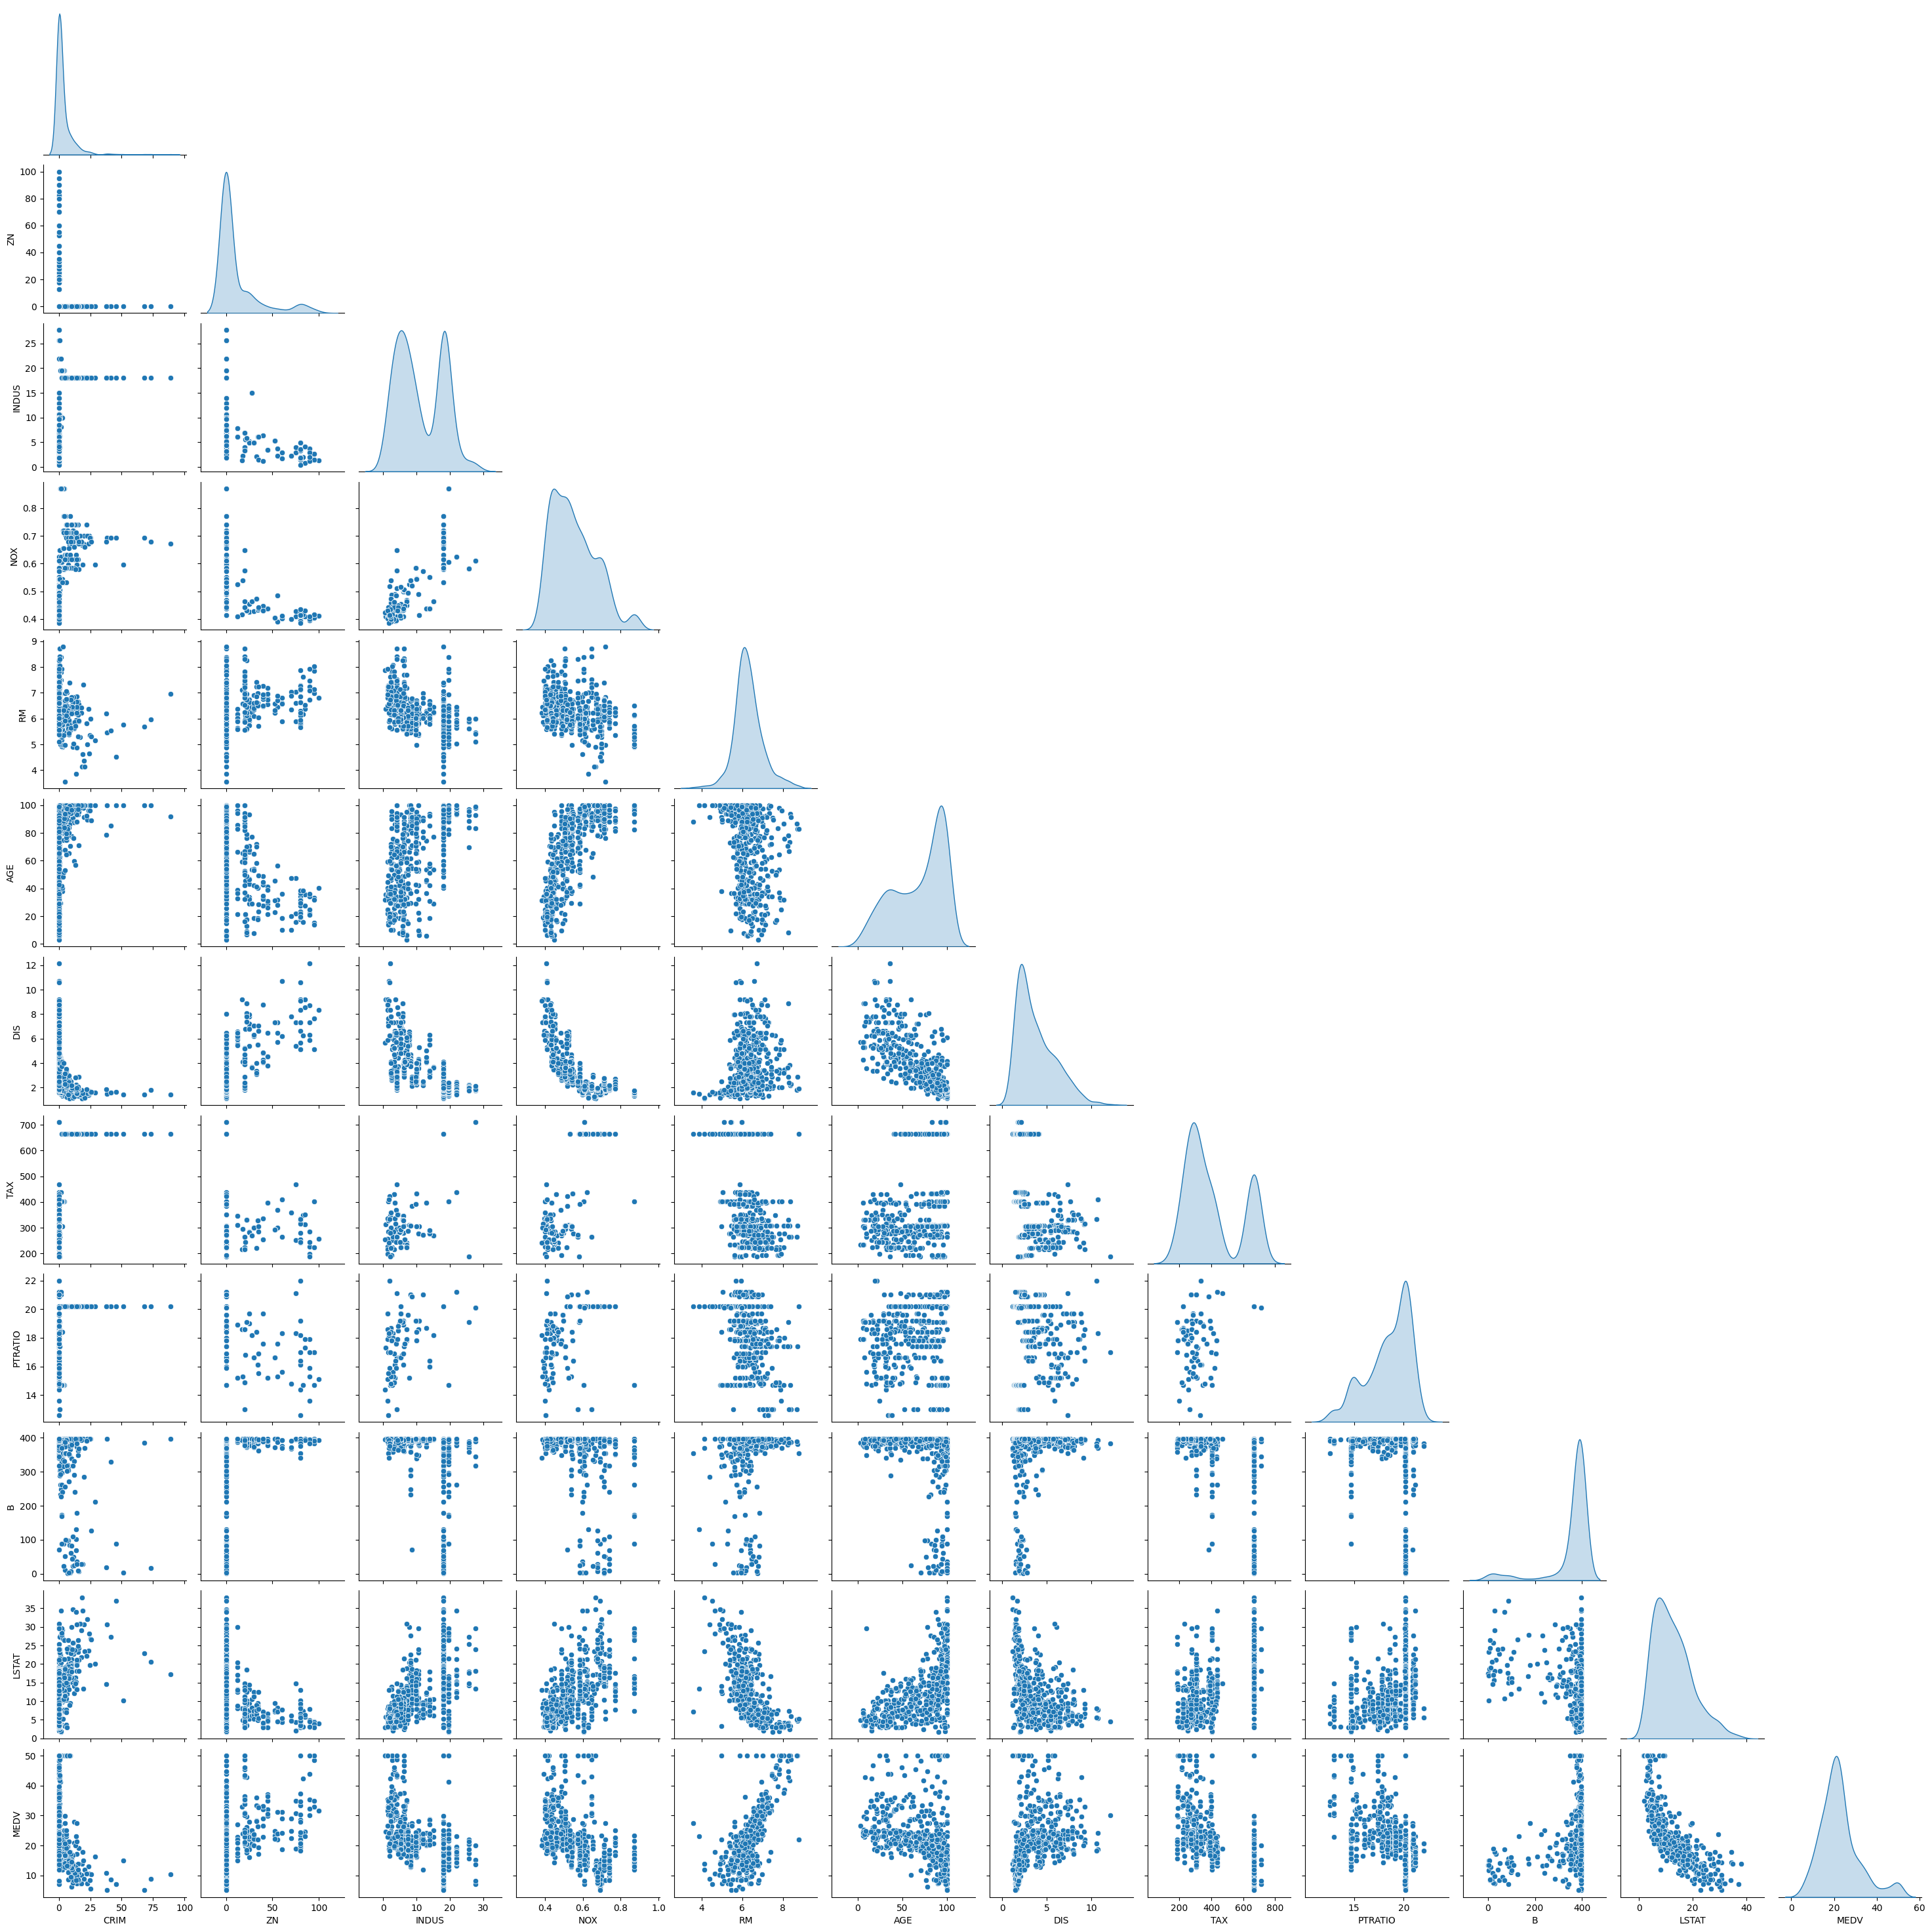

In [16]:
sns.pairplot(
    numeric,
    diag_kind="kde",
    corner=True
)
plt.show()

# Partial Dependence

/tmp/ipython-input-230259175.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


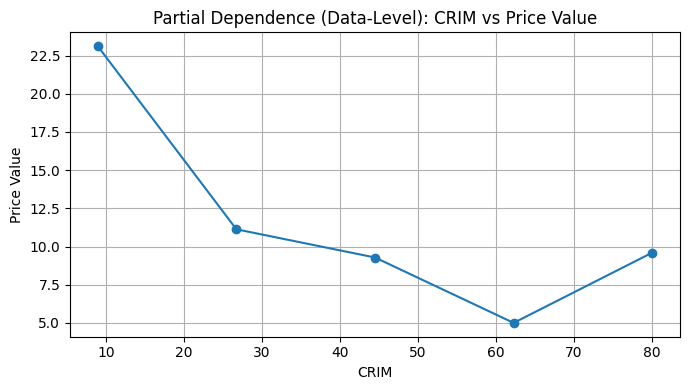

/tmp/ipython-input-230259175.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


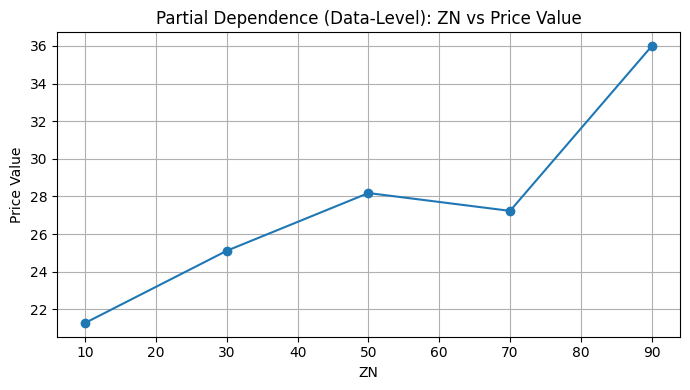

/tmp/ipython-input-230259175.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


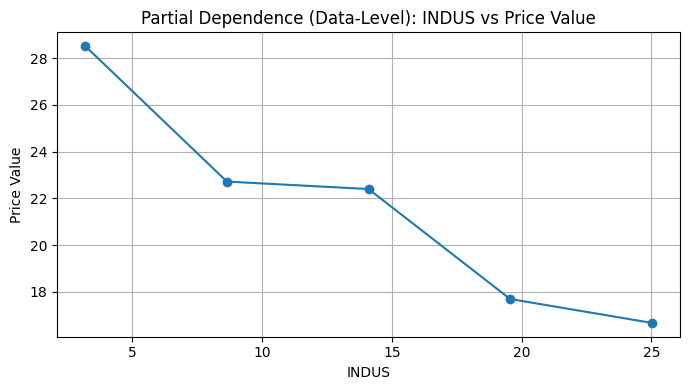

/tmp/ipython-input-230259175.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


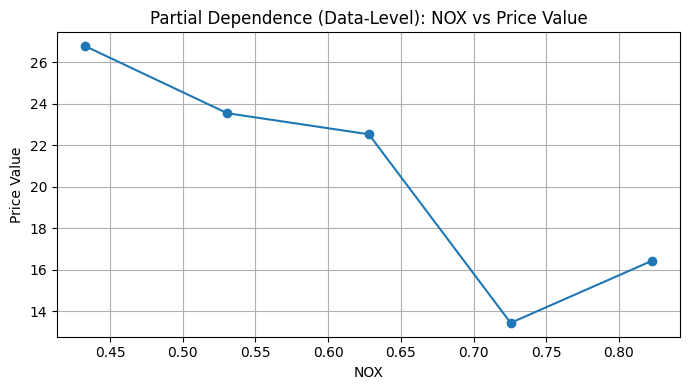

/tmp/ipython-input-230259175.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


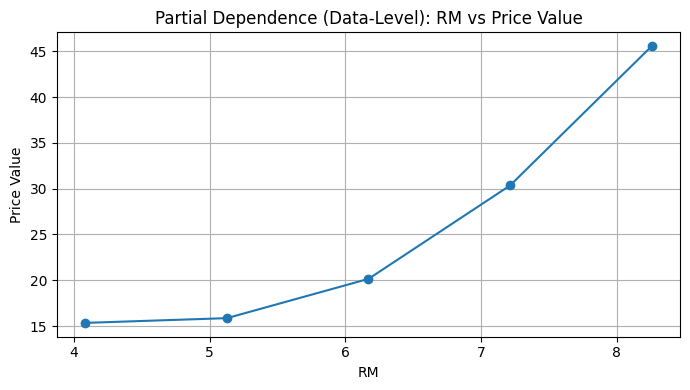

/tmp/ipython-input-230259175.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


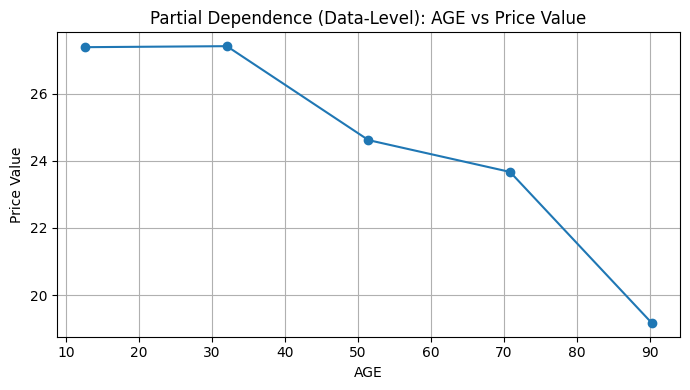

/tmp/ipython-input-230259175.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


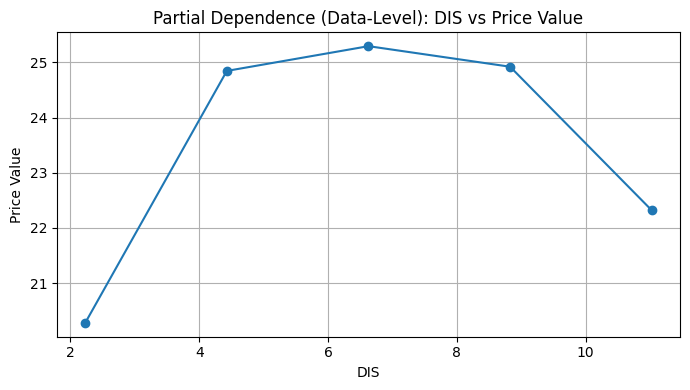

/tmp/ipython-input-230259175.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


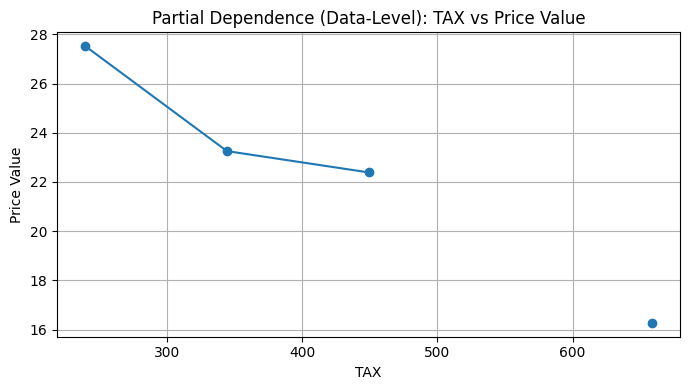

/tmp/ipython-input-230259175.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


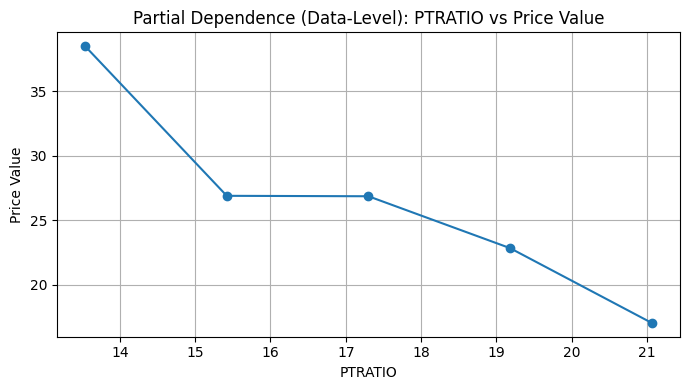

/tmp/ipython-input-230259175.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


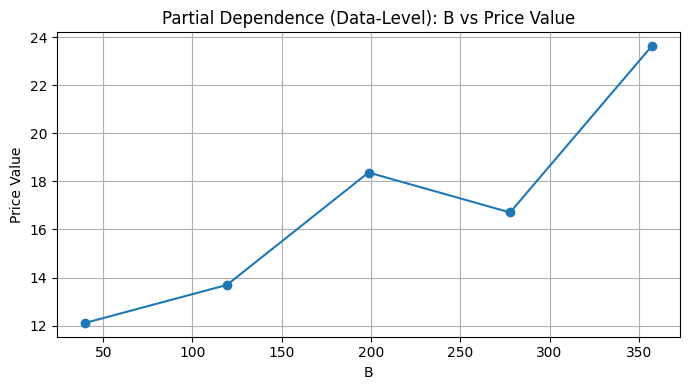

/tmp/ipython-input-230259175.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


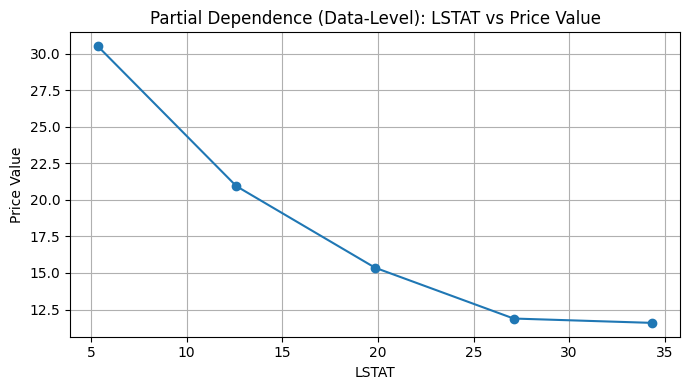

In [17]:
import numpy as np
import matplotlib.pyplot as plt


numeric_features = numeric.select_dtypes(include=['int64', 'float64']).columns.drop(target)

num_bins = 6

for feature in numeric_features:
    temp_df = numeric_df[[feature, target]].dropna().copy()

    # Create bin edges (must be monotonically increasing)
    bin_edges = np.linspace(
        temp_df[feature].min(),
        temp_df[feature].max(),
        num_bins
    )

    # Assign bins correctly
    temp_df['bin'] = pd.cut(
        temp_df[feature],
        bins=bin_edges,
        include_lowest=True
    )

    # Mean target per bin
    mean_production = temp_df.groupby('bin')[target].mean()
    bin_centers = [interval.mid for interval in mean_production.index]

    # Plot
    plt.figure(figsize=(7, 4))
    plt.plot(bin_centers, mean_production.values, marker='o')
    plt.xlabel(feature)
    plt.ylabel("Price Value")
    plt.title(f"Partial Dependence (Data-Level): {feature} vs Price Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()